# Importing and Setting Up Dataset

In [430]:
pip install ucimlrepo


In [431]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import statsmodels.api as sm
label_encoder = LabelEncoder()
scaler = StandardScaler()

from ucimlrepo import fetch_ucirepo

# https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant
# fetch dataset
combined_cycle_power_plant = fetch_ucirepo(id=294)

# data (as pandas dataframes)
X = combined_cycle_power_plant.data.features
y = combined_cycle_power_plant.data.targets

# metadata
print(combined_cycle_power_plant.metadata)

# variable information
print(combined_cycle_power_plant.variables)


{'uci_id': 294, 'name': 'Combined Cycle Power Plant', 'repository_url': 'https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant', 'data_url': 'https://archive.ics.uci.edu/static/public/294/data.csv', 'abstract': 'The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 9568, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['PE'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2014, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5002N', 'creators': ['Pnar Tfekci', 'Heysem Kaya'], 'intro_paper': {'ID': 406, 'type': 'NATIVE', 'title': 'Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods', 'aut

In [432]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


In [433]:
#Renaming the features to their full names listed from Dataset website
X.columns = ["Temperature", "Exhaust Vacuum", "Ambient Pressure", "Relative Humidity"]
print(X)

      Temperature  Exhaust Vacuum  Ambient Pressure  Relative Humidity
0           14.96           41.76           1024.07              73.17
1           25.18           62.96           1020.04              59.08
2            5.11           39.40           1012.16              92.14
3           20.86           57.32           1010.24              76.64
4           10.82           37.50           1009.23              96.62
...           ...             ...               ...                ...
9563        16.65           49.69           1014.01              91.00
9564        13.19           39.18           1023.67              66.78
9565        31.32           74.33           1012.92              36.48
9566        24.48           69.45           1013.86              62.39
9567        21.60           62.52           1017.23              67.87

[9568 rows x 4 columns]


In [434]:
#Renaming the target to the full name listed from Dataset website
y.columns = ["Energy Output"]
print(y)

      Energy Output
0            463.26
1            444.37
2            488.56
3            446.48
4            473.90
...             ...
9563         460.03
9564         469.62
9565         429.57
9566         435.74
9567         453.28

[9568 rows x 1 columns]


In [435]:
#Double check if there are still null values
print(X.isnull().sum())

Temperature          0
Exhaust Vacuum       0
Ambient Pressure     0
Relative Humidity    0
dtype: int64


In [436]:
#Double check if there are still null values
print(y.isnull().sum())

Energy Output    0
dtype: int64


# Create Graphs to Find Correlations

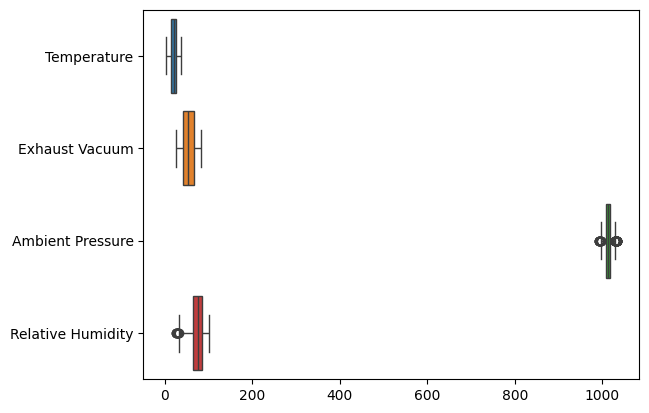

In [437]:
#Created Boxplot to see if there is any outliers
sns.boxplot(X, orient= 'h')
plt.show()

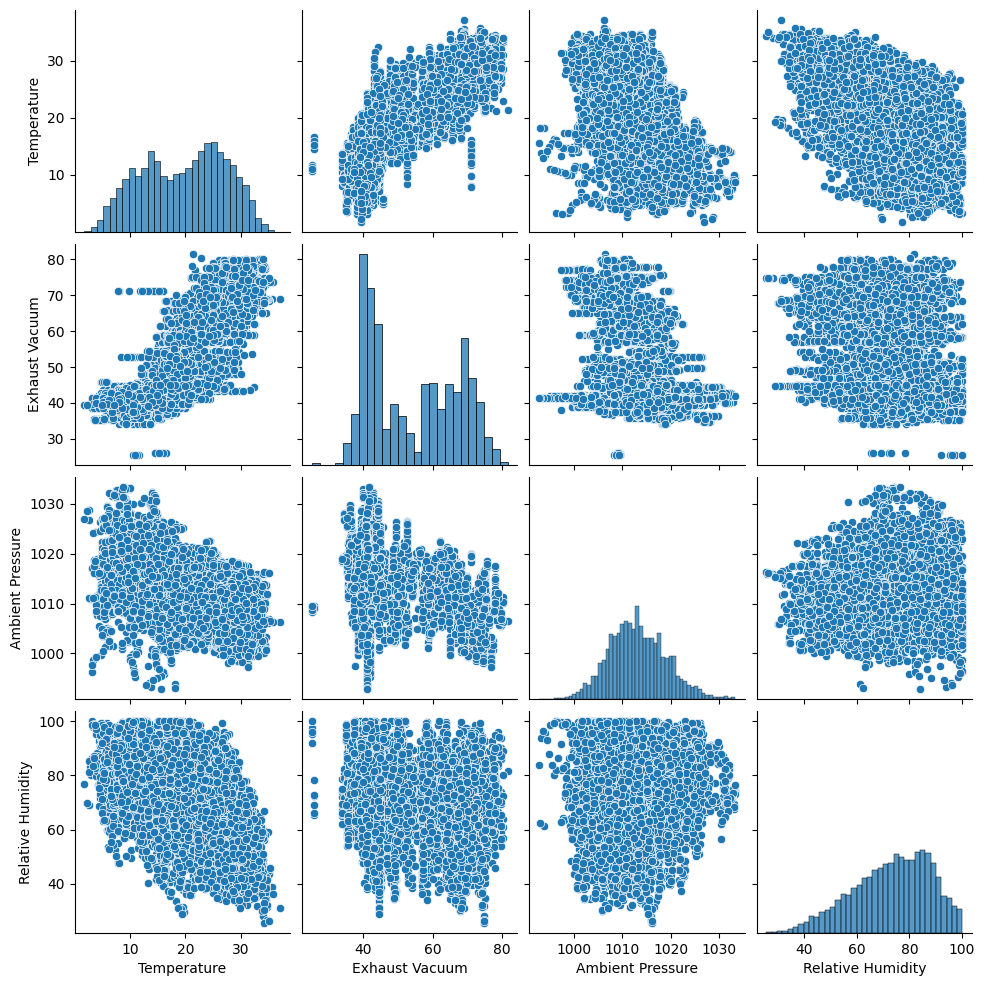

In [438]:
#Created pairplot to see correlation between features
sns.pairplot(X)
plt.show()

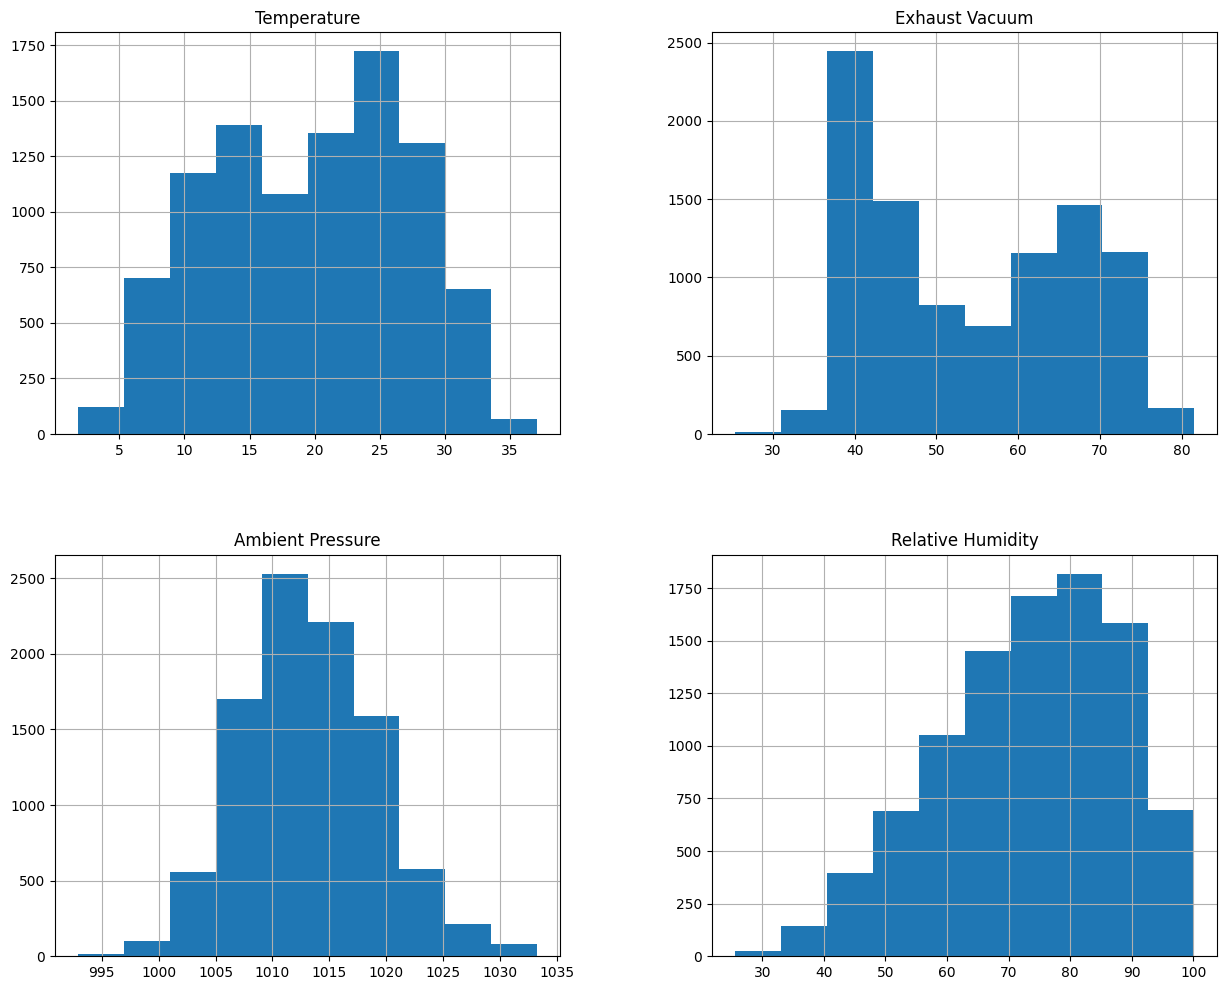

In [439]:
#Created histogram to see distribution of features
X.hist(figsize=(15,12))
plt.show()

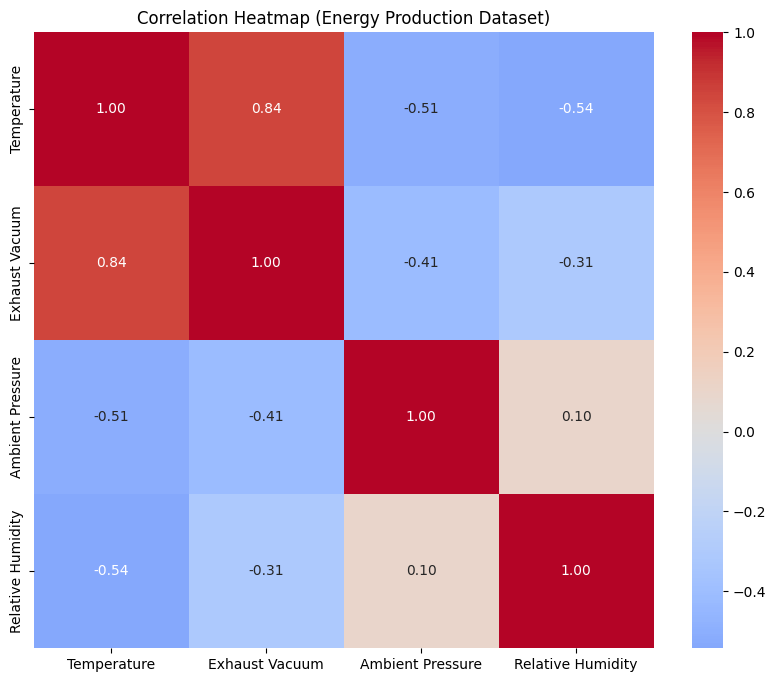

In [440]:
#Created correlation heatmap to better visualize the pairplots
corr = X.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Energy Production Dataset)")
plt.show()


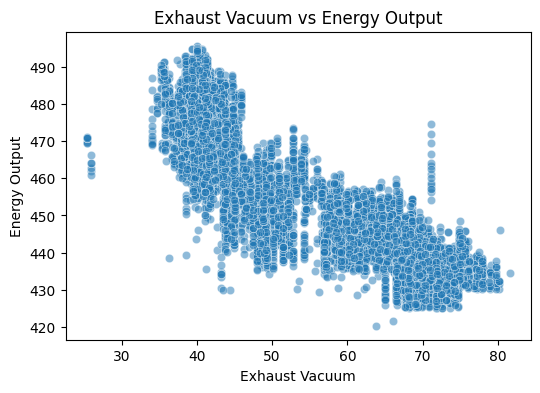

In [441]:
#Exhaust Vacuum vs Engergy Output
plt.figure(figsize=(6,4))
sns.scatterplot(x=X["Exhaust Vacuum"], y=y["Energy Output"], alpha=0.5)
plt.xlabel("Exhaust Vacuum")
plt.ylabel("Energy Output")
plt.title("Exhaust Vacuum vs Energy Output")
plt.show()


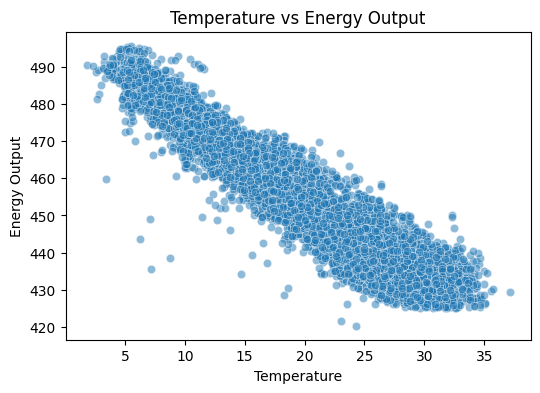

In [442]:
#Temperature vs Energy Output
plt.figure(figsize=(6,4))
sns.scatterplot(x=X["Temperature"], y=y["Energy Output"], alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("Energy Output")
plt.title("Temperature vs Energy Output")
plt.show()

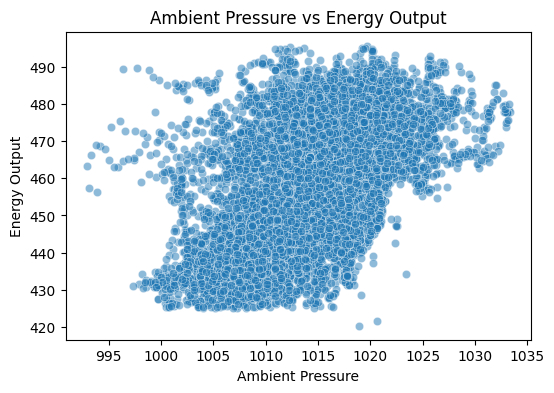

In [443]:
#Ambient Pressure vs Engery Output
plt.figure(figsize=(6,4))
sns.scatterplot(x=X["Ambient Pressure"], y=y["Energy Output"], alpha=0.5)
plt.xlabel("Ambient Pressure")
plt.ylabel("Energy Output")
plt.title("Ambient Pressure vs Energy Output")
plt.show()

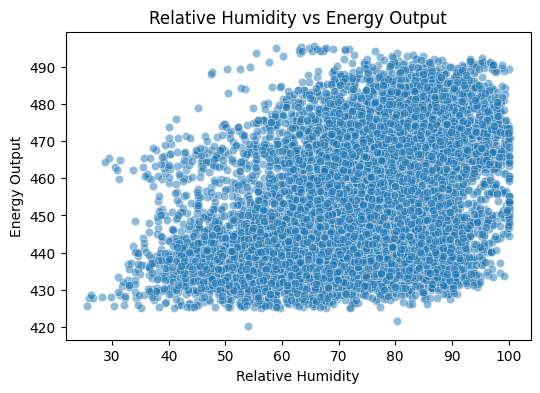

In [444]:
#Relative Humidity vs Energy Output
plt.figure(figsize=(6,4))
sns.scatterplot(x=X["Relative Humidity"], y=y["Energy Output"], alpha=0.5)
plt.xlabel("Relative Humidity")
plt.ylabel("Energy Output")
plt.title("Relative Humidity vs Energy Output")
plt.show()

In [445]:
#Drop Relative Humidity and Ambient Pressure from X
X = X.drop(["Ambient Pressure", "Relative Humidity"], axis=1)
print(X)

      Temperature  Exhaust Vacuum
0           14.96           41.76
1           25.18           62.96
2            5.11           39.40
3           20.86           57.32
4           10.82           37.50
...           ...             ...
9563        16.65           49.69
9564        13.19           39.18
9565        31.32           74.33
9566        24.48           69.45
9567        21.60           62.52

[9568 rows x 2 columns]


# Preprocessing/Spliting Data into Training and Testing

In [446]:
#Transform X into X_scaled
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
print(X_scaled)

             0         1
0    -0.629519 -0.987297
1     0.741909  0.681045
2    -1.951297 -1.173018
3     0.162205  0.237203
4    -1.185069 -1.322539
...        ...       ...
9563 -0.402737 -0.363242
9564 -0.867037 -1.190331
9565  1.565840  1.575811
9566  0.647976  1.191778
9567  0.261507  0.646419

[9568 rows x 2 columns]


In [447]:
#Standerdize y to be an array and one dimensional
y = y.to_numpy()
y = y.ravel()
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [448]:
#Split data into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)

# SDG Regressor

In [460]:
#Hyper Parameters and using the Regressor Model
alphaVar = 1
eta0Var = 1
maxIterVar = 100000000
tolVar = 1e-05
learningRateVar = "invscaling"
penaltyVar = "l1"
SGDmodel = SGDRegressor(alpha = 1, eta0=eta0Var, max_iter = maxIterVar, tol = tolVar, learning_rate = learningRateVar, penalty = penaltyVar)
SGDmodel.fit(X_train, y_train)

SGDRegressor(alpha=1, eta0=1, max_iter=100000000, penalty='l1', tol=1e-05)

In [461]:
#Use for seeing how well target prediction matches target actual
y_predSGD = SGDmodel.predict(X_test)

In [451]:
SGDmodel.coef_

array([-12.80124491,  -5.03227329])

In [452]:
SGDmodel.intercept_

array([453.14204966])

In [453]:
SGDmodel.score(X_test, y_test)

0.9130726053504448

In [454]:
mse = mean_squared_error(y_test, y_predSGD)
mae = mean_absolute_error(y_test, y_predSGD)
ev = explained_variance_score(y_test, y_predSGD)
r2 = r2_score(y_test, y_predSGD)
mse, mae, ev, r2

(25.040066294932586, 3.924478136692507, 0.9172795575706676, 0.9130726053504448)

# OLS Model

In [462]:
#More standarization method, as without it, the evaluation will look skewed
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
print(X_train_const)
print(X_test_const)

      const         0         1
2246    1.0 -0.430917 -0.811019
2836    1.0 -1.040143 -1.191905
2684    1.0 -1.250822 -1.071501
2967    1.0  0.150128 -0.829119
3100    1.0  1.779203  1.524659
...     ...       ...       ...
7286    1.0  1.392734  1.236634
3046    1.0  0.387646 -0.185391
4079    1.0  0.111213 -0.226312
2254    1.0  1.292091  1.634833
2915    1.0  0.717755  1.212239

[7654 rows x 3 columns]
      const         0         1
6167    1.0  1.298800  0.828992
8395    1.0  0.721781  0.514211
6736    1.0 -1.171650 -1.053401
919     1.0  1.061283  0.993466
3099    1.0  1.261227  1.096557
...     ...       ...       ...
966     1.0  0.949905  1.143774
2013    1.0  1.109592  1.174465
4812    1.0 -0.626836 -0.811806
6364    1.0  0.222591 -0.277464
7871    1.0 -0.562424 -1.311521

[1914 rows x 3 columns]


In [456]:
model = sm.OLS(y_train, X_train_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 4.107e+04
Date:                Sun, 21 Sep 2025   Prob (F-statistic):               0.00
Time:                        20:18:27   Log-Likelihood:                -23161.
No. Observations:                7654   AIC:                         4.633e+04
Df Residuals:                    7651   BIC:                         4.635e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.3978      0.057   7968.260      0.0

In [457]:
#Use for seeing how well target prediction matches target actual
y_predOLS = results.predict(X_test_const)

In [458]:
mse = mean_squared_error(y_test, y_predOLS)
mae = mean_absolute_error(y_test, y_predOLS)
ev = explained_variance_score(y_test, y_predOLS)
r2 = r2_score(y_test, y_predOLS)
mse, mae, ev, r2

(23.212254682307425, 3.8402925569931483, 0.919511040350015, 0.919417912089024)

In [459]:
sm.tools.eval_measures.rmse(y_test, y_predOLS)

np.float64(4.81790978353761)